# Подготовка данных и окружения

In [30]:
# %pip install kaggle
# %pip install kagglehub

# import kaggle
# kaggle.api.authenticate()
# kaggle.api.dataset_download_file(dataset='maharshipandya/-spotify-tracks-dataset')

# import kagglehub
# kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

In [31]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [32]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# EDA и Research-анализ

### Общий обзор датасета

In [34]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


#### Описание полей датасета Spotify

| Поле                | Описание |
|---------------------|----------|
| **track_id**        | ID трека в Spotify |
| **artists**         | Имена исполнителей трека. Если исполнителей несколько — разделены точкой с запятой (;) |
| **album_name**      | Название альбома, в котором находится трек |
| **track_name**      | Название трека |
| **popularity**      | Популярность трека (0–100). 100 — максимальная популярность. Рассчитывается алгоритмом в основном по количеству и актуальности прослушиваний. Треки, которые сейчас активно слушают, имеют более высокую популярность. Одинаковые треки (сингл и альбомная версия) оцениваются отдельно. Популярность артиста и альбома выводится математически из популярности треков |
| **duration_ms**     | Длительность трека в миллисекундах |
| **explicit**        | Присутствует ли нецензурная лексика (true — да, false — нет или неизвестно) |
| **danceability**    | Танцевальность (0.0 – 1.0). Насколько трек подходит для танцев (учитываются темп, стабильность ритма, сила бита и регулярность) |
| **energy**          | Энергичность (0.0 – 1.0). Отражает интенсивность и активность. Энергичные треки обычно быстрые, громкие и «шумные» (например, дэт-метал — высокая, прелюдия Баха — низкая) |
| **key**             | Тональность трека. Целые числа по стандартной нотации Pitch Class:<br>0 = До (C), 1 = До♯/Ре♭, 2 = Ре (D), …<br>Если не определена — -1 |
| **loudness**        | Общая громкость трека в децибелах (дБ) |
| **mode**            | Лад: мажор = 1, минор = 0 |
| **speechiness**     | Речевая насыщенность (0.0 – 1.0):<br>• >0.66 — почти наверняка только речь (ток-шоу, аудиокниги)<br>• 0.33–0.66 — смесь музыки и речи (в т.ч. рэп)<br>• <0.33 — преимущественно музыка |
| **acousticness**    | Уверенность в акустичности трека (0.0 – 1.0). 1.0 — очень высокая вероятность акустического звучания |
| **instrumentalness**| Вероятность отсутствия вокала (0.0 – 1.0). Звуки типа «ooh» и «aah» считаются инструментальными |
| **liveness**        | Вероятность живой записи с аудиторией (0.0 – 1.0). Значения >0.8 с высокой вероятностью указывают на концертную запись |
| **valence**         | Музыкальная позитивность (0.0 – 1.0). Высокие значения — радостные/весёлые/эйфоричные треки, низкие — грустные/злые/депрессивные |
| **tempo**           | Темп трека в ударах в минуту (BPM) |
| **time_signature**  | Оценочный музыкальный размер (количество долей в такте). Значения 3–7 соответствуют 3/4, 4/4, … 7/4 |
| **track_genre**     | Жанр трека |

### Анализ пропущенных значений

In [35]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Заключение по пропускам

Обнаружены пропуски в метаданных треков (artists, album_name, track_name). Однако эти признаки имеют низкую корреляцию с целевой переменной и высокую кардинальность, что делает их малопригодными для моделирования. Решение: исключить эти признаки из анализа.

### Очистка данных

Удаляем технические и высококардинальные признаки, которые не подходят для моделирования.

In [36]:
data = data.drop(columns=['Unnamed: 0', 'track_id', 'track_name'])
data.head()

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Статистический анализ признаков

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   popularity        114000 non-null  int64  
 3   duration_ms       114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

### Анализ распределений признаков

Предполагается, что аудио-характеристики будут иметь различные типы распределений в зависимости от их природы.  
Ожидается асимметрия в распределении популярности и специфических характеристик.

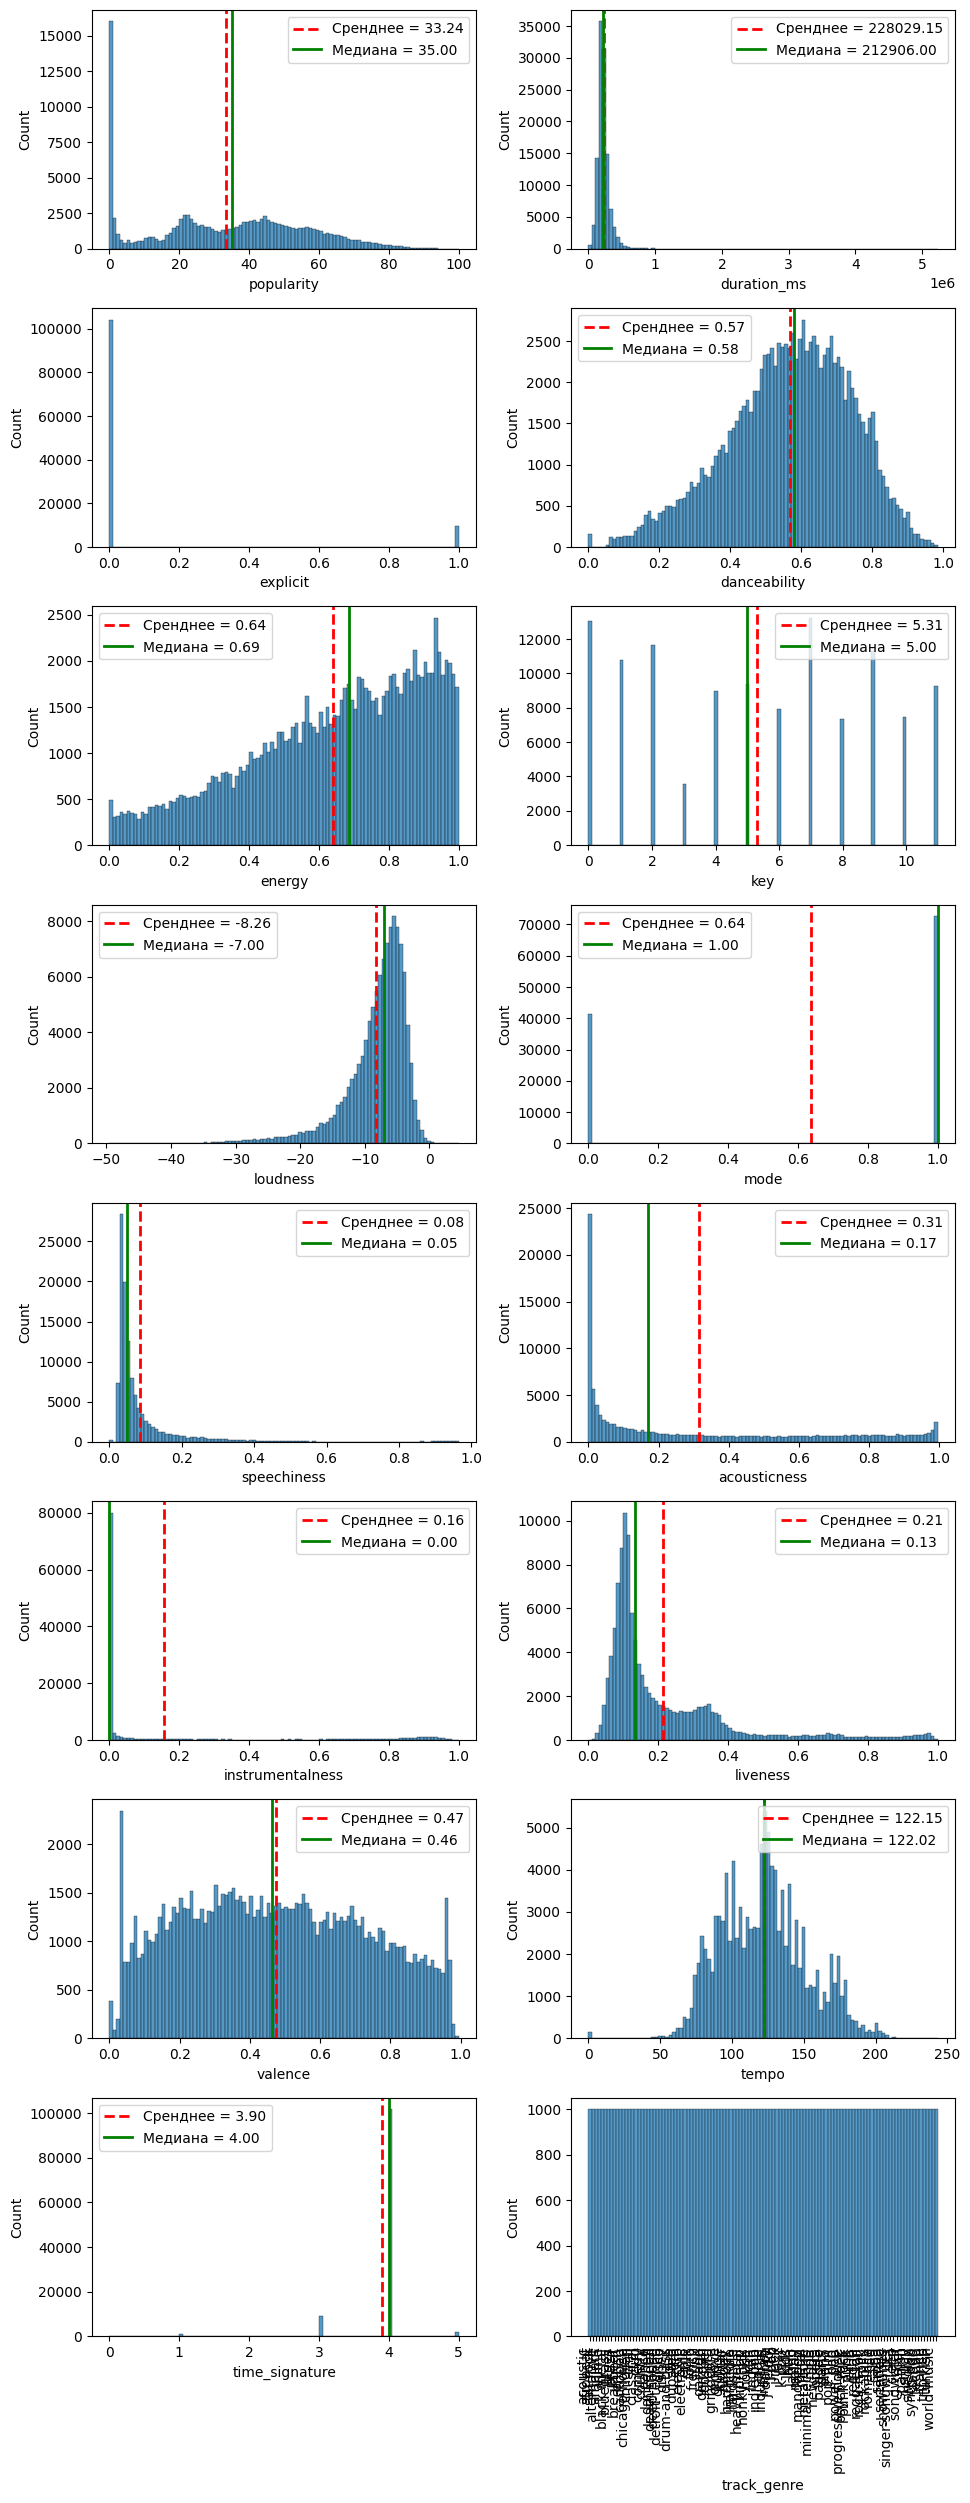

In [38]:
data_t = data.drop(columns=['artists','album_name'])
cols = data_t.columns.tolist()
n = len(cols)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axs = axs.flatten()

for i, col in enumerate(cols):
    ax = axs[i]
    sns.histplot(data_t[col], bins=100, ax=ax, edgecolor='k',  stat='count')
    if data_t[col].dtype not in ['object', 'bool']:
        mean_val = data_t[col].mean()
        median_val = data_t[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Сренднее = {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Медиана = {median_val:.2f}')
        ax.legend()

for j in range(n, len(axs)):
    axs[j].axis('off')


fig.tight_layout()
plt.xticks(rotation=90, ha='right') 
plt.show()

Результаты анализа распределений

1. **Популярность**: Выявлен значительный пик в области нулевых значений, что указывает на преобладание малоизвестных треков в выборке.
2. **Речевые характеристики**: Подтверждена экспоненциальная природа распределений speechiness и instrumentalness.
3. **Энергетические характеристики**: Распределения energy и tempo приближены к нормальным.

### Влияние жанра на популярность

Предполагается наличие значительной зависимости популярности от музыкального жанра.

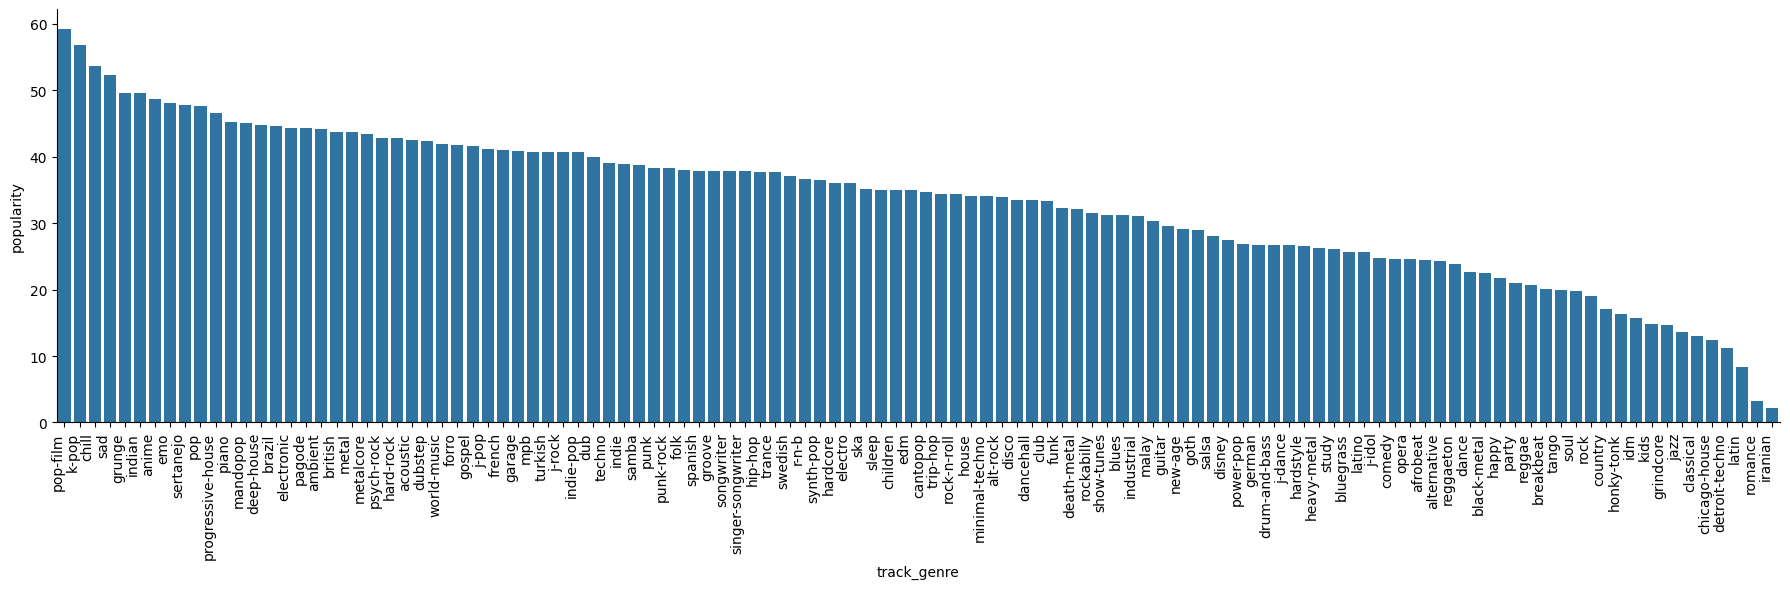

In [39]:
popularity_genres = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

sns.catplot(popularity_genres, kind="bar", height=6, aspect=3)

plt.xticks(rotation=90, ha='right')    
plt.tight_layout()                     
plt.show()

Самым популярным жанром являеться поп музыка к фильмам, за ним идёт k-pop, chill, sad.  
На базе информации предоставляемой графиком можно сказать, что в зависимости от жанра будет меняться и средняя популярность трека, это важный параметр.




### Корреляционный анализ

Ожидается выявление линейных зависимостей между аудио-характеристиками и популярностью.

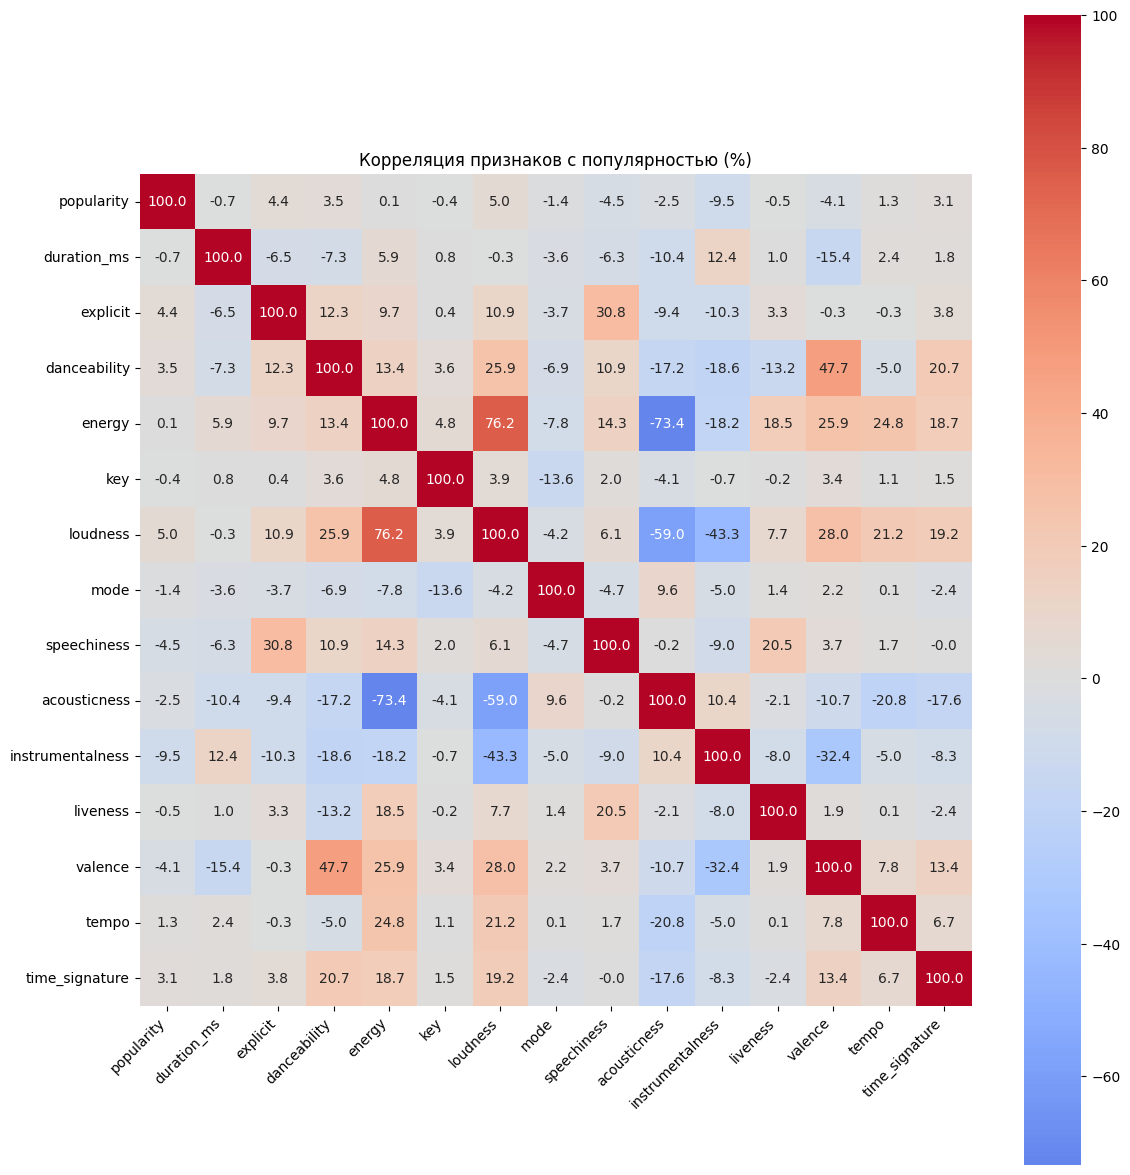

In [40]:
data_corr = data.drop(columns=['track_genre', 'artists','album_name']).corr()
data_corr *= 100

plt.figure(figsize=(12,12))
sns.heatmap(data_corr, annot=True, fmt='.1f', cmap='coolwarm', center=0, square=True)
plt.title('Корреляция признаков с популярностью (%)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


Выявлена слабая линейная корреляция с целевой переменной (максимум -9.5%), что указывает на необходимость применения нелинейных моделей.  

Признаки energy, loudness и acousticness образуют жесткий треугольник зависимостей. Energy и loudness дублируют друг друга (+76%), а acousticness является их антагонистом (-73% с energy).

Заметная корреляция (+48%) между valence (позитивность) и danceability (танцевальность). Имеет смысл создать синтетический признак, например valence * danceability.

### Классификация признаков

### Определение типов переменных

Проводится разделение признаков на количественные и категориальные на основе анализа уникальных значений.

In [41]:
data.nunique()

artists             31437
album_name          46589
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

Определим как категориальные:  
* key        
* mode               
* time_signature        
* track_genre                              
* explicit                

Остальные же пока будут отнесены к количественным.

### Обработка количественных признаков

In [42]:
num_data = data.drop(columns=['artists','album_name','popularity', 'explicit', 'key', 'mode', 'time_signature', 'track_genre'])
num_data.head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


Давайте ещё раз посмотрим на корреляцию исключительно количественных признаков с таргетом.

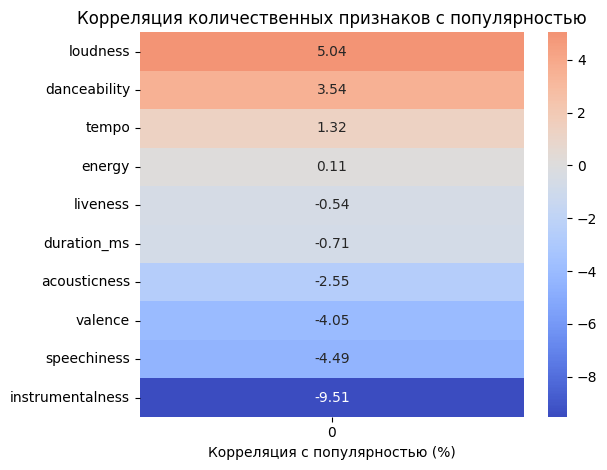

In [43]:
num_data_corr = num_data.corrwith(data['popularity']).sort_values(ascending=False)
num_data_corr *= 100

sns.heatmap(num_data_corr.to_frame(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.xlabel('Корреляция с популярностью (%)')
plt.title('Корреляция количественных признаков с популярностью')
plt.tight_layout()
plt.show()

Ничего интересного, новых выводов на основе этого мы не сделаем..

### Обработка категориальных признаков

In [44]:
cat_data = data.loc[:, ['artists','album_name','explicit', 'key', 'mode', 'time_signature', 'track_genre']]
cat_data.head()

,artists,album_name,explicit,key,mode,time_signature,track_genre
0,Gen Hoshino,Comedy,False,1,0,4,acoustic
1,Ben Woodward,Ghost (Acoustic),False,1,1,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,False,0,1,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,False,0,1,3,acoustic
4,Chord Overstreet,Hold On,False,2,1,4,acoustic


Категориальные признаки сейчас находяться в состоянии в котором их нельзя использовать для обучения.  
Давайте воспользуемся `LabelEncoder` для того, чтобы превратить их в данные интерпретируемые моделями ML.

In [45]:
le_dict = {}
for col in cat_data.columns:
    le = LabelEncoder()
    cat_data[col] = le.fit_transform(cat_data[col])
    le_dict[col] = le
cat_data.head()


#Для возвращения категориальных признаков в исходный вид

# for col in le_dict:
#     print(f"Категории для столбца '{col}': {le_dict[col].classes_}")
#     cat_data[col] = le_dict[col].inverse_transform(cat_data[col])

# cat_data.head()

,artists,album_name,explicit,key,mode,time_signature,track_genre
0,10357,8100,0,1,0,3,0
1,3287,14796,0,1,1,3,0
2,12397,39162,0,0,1,3,0
3,14839,8580,0,0,1,2,0
4,5255,16899,0,2,1,3,0


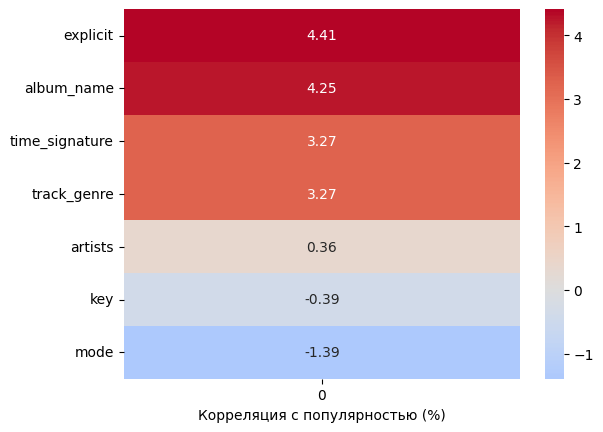

In [46]:
cat_data_corr = cat_data.corrwith(data['popularity']).sort_values(ascending=False)
cat_data_corr *= 100
sns.heatmap(cat_data_corr.to_frame(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.xlabel('Корреляция с популярностью (%)')
plt.show()

Довольно странно, но наличие\отсутствие ненормативной лексики имеет корреляцию с таргетом в районе 4.5%, скорее всего это связанно исключительно с выборкой.

In [47]:
new_data = pd.concat([data['popularity'], num_data, cat_data], axis=1)
new_data.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists,album_name,explicit,key,mode,time_signature,track_genre
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,10357,8100,0,1,0,3,0
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,3287,14796,0,1,1,3,0
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,12397,39162,0,0,1,3,0
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,14839,8580,0,0,1,2,0
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,5255,16899,0,2,1,3,0


# Feature Engineering

### Создание синтетических признаков

In [48]:
featured_data = new_data.copy()

Преобразование длительности в минуты для улучшения интерпретируемости

In [49]:
featured_data['duration_min'] = new_data.duration_ms / 60000

Нормализация громкости: приведение к положительному диапазону [0, 1]

In [50]:
featured_data['loudness_norm']  = (new_data.loudness + 60) / 60

После нормализации мы можем объеденить признаки `loudness` и `energy` и привести их к среднему из-за их высокой степени корреляции друг между другом.

In [51]:
featured_data['loudness_energy_ratio']  = (featured_data.loudness_norm + new_data.energy) / 2

Комбинация энергичности и танцевальности (вместо энергичности можем использовать их новую комбинацию)  

Треки с высокими значениями обоих показателей могут быть более популярны.

In [52]:
featured_data['dance_energy_ratio'] = new_data['danceability'] * featured_data['loudness_energy_ratio']

Имеющие высокую корреляцию `danceability` и `valence` можно попробовать объеденить для создания синтетического признака.  

Грустные треки редко бывают танцевальными.

In [53]:
featured_data['dance_valence_ratio'] = new_data['danceability'] * new_data['valence']

Акустический индекс: Отбратная к комбинации акустичности и инструментальности    

Позволяет выделить "электронной" музыку в противовес живой

In [54]:
featured_data['electro_score'] = 1 - ((new_data['acousticness'] + new_data['instrumentalness']) / 2)

Категоризация темпа по музыкальным стандартам  

Диапазоны: Медленный (0-80), Средний (80-120), Быстрый (120-160), Очень быстрый (160+)

In [55]:
featured_data['tempo_cat'] = pd.cut(new_data['tempo'], 
                                    bins=[0, 80, 120, 160, 300], 
                                    labels=[0, 1, 2, 3]).fillna(1).astype(int)

In [56]:
# featured_data = featured_data.drop(columns=['duration_ms', 'loudness'])

### Валидация новых признаков

Создадим 2 модели машинного обучения, чтобы на них проверить какие из признаков оказывают наибольшее влияние на точность определения `popularity`

In [57]:
x = featured_data.drop(columns=['popularity']) 
y = featured_data['popularity'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Нейронная сеть

In [58]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

neuro_model_perm = keras.Sequential()
neuro_model_perm.add(keras.layers.Input(shape=(x_train.shape[1],)))
neuro_model_perm.add(keras.layers.Dense(64, activation='relu'))
neuro_model_perm.add(keras.layers.Dropout(0.2))
neuro_model_perm.add(keras.layers.Dense(32, activation='relu'))
neuro_model_perm.add(keras.layers.Dropout(0.1))
neuro_model_perm.add(keras.layers.Dense(16, activation='relu'))
neuro_model_perm.add(keras.layers.Dense(1))


neuro_model_perm.compile(optimizer='AdamW', 
              loss='mean_squared_error',
              metrics= [metrics.MeanAbsoluteError(),metrics.R2Score()])

neuro_model_perm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

neuro_model_perm.evaluate(x_test, y_test)

neuro_result = permutation_importance(neuro_model_perm, x_test, y_test, n_repeats=5, random_state=42, scoring='neg_mean_absolute_error')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - loss: 446.6161 - mean_absolute_error: 17.2693 - r2_score: 0.0950
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0

<Axes: xlabel='Изменение MAE от признака', ylabel='None'>

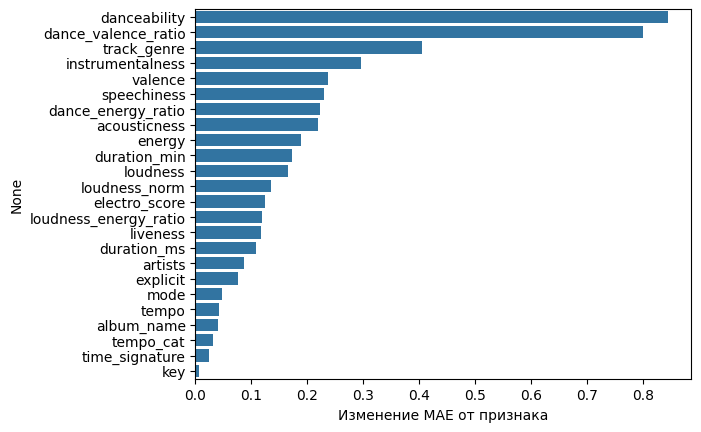

In [59]:
mean_loss_df = pd.DataFrame(
    neuro_result.importances_mean, 
    index=featured_data.drop(columns=['popularity']).columns, 
    columns=['Изменение MAE от признака']).sort_values(by='Изменение MAE от признака', ascending=False)
mean_loss_df
sns.barplot(x=mean_loss_df['Изменение MAE от признака'], y=mean_loss_df.index)

#### Дерево решений

In [60]:
dtr_model_perm = DecisionTreeRegressor(max_depth=i, random_state=42)  
dtr_model_perm.fit(x_train, y_train)

dtr_result = permutation_importance(dtr_model_perm, x_test, y_test, n_repeats=5, random_state=42, scoring='neg_mean_absolute_error')

<Axes: xlabel='Изменение MAE от признака', ylabel='None'>

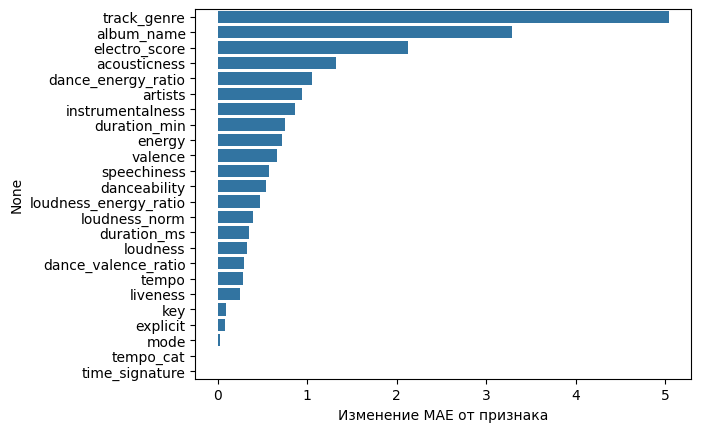

In [61]:
mean_loss_df = pd.DataFrame(
    dtr_result.importances_mean, 
    index=featured_data.drop(columns=['popularity']).columns, 
    columns=['Изменение MAE от признака']).sort_values(by='Изменение MAE от признака', ascending=False)
mean_loss_df
sns.barplot(x=mean_loss_df['Изменение MAE от признака'], y=mean_loss_df.index)

### Анализ важности признаков

Оценка вклада каждого признака в предсказательную способность модели методом permutation importance.

In [62]:
# featured_data = featured_data.drop(columns=['tempo_cat'])
featured_data.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,mode,time_signature,track_genre,duration_min,loudness_norm,loudness_energy_ratio,dance_energy_ratio,dance_valence_ratio,electro_score,tempo_cat
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,...,0,3,0,3.844433,0.887567,0.674283,0.455816,0.483340,0.983899,1
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,...,1,3,0,2.493500,0.712750,0.439375,0.184537,0.112140,0.537997,0
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,...,1,3,0,3.513767,0.837767,0.598383,0.262092,0.052560,0.895000,0
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,...,1,2,0,3.365550,0.691417,0.375508,0.099885,0.038038,0.547465,3
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,...,1,3,0,3.314217,0.838650,0.640825,0.396030,0.103206,0.765500,1


# Моделирование и сравнение алгоритмов

In [63]:
def metrics_evaluate(model, x_test, y_test, x_train, y_train):
    y_pred_test = np.ravel(model.predict(x_test))
    y_pred_train = np.ravel(model.predict(x_train))

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test  = r2_score(y_test, y_pred_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train  = r2_score(y_train, y_pred_train)

    df = pd.DataFrame(
        {
            'mae_test': [mae_test],
            'mae_train': [mae_train],
            'mse_test': [mse_test],
            'mse_train': [mse_train],
            'r2_test': [r2_test],
            'r2_train': [r2_train]
        },

    )
    return df

In [64]:
x = featured_data.drop(columns=['popularity']) 
y = featured_data['popularity'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Линейная регрессия 


Попробуем посмотреть на то, как справиться с этой задачей линейная регрессия.

In [65]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_metrics_df = metrics_evaluate(linear_model, x_test, y_test, x_train, y_train)
linear_metrics_df.T

,0
mae_test,18.261887
mae_train,18.330165
mse_test,479.686645
mse_train,483.146689
r2_test,0.027953
r2_train,0.030820


Справилась она плохо.

### Нейронная сеть

Создадим нейронную сеть состоящую из 4 скрытых слоёв и добавим слои пропусков ((нулевых значений )между ними, чтобы замедлить переобучение.

In [66]:
neuro_model = keras.Sequential()
neuro_model.add(keras.layers.Input(shape=(x_train.shape[1],)))
neuro_model.add(keras.layers.Dense(128, activation='relu'))
neuro_model.add(keras.layers.Dropout(0.2))
neuro_model.add(keras.layers.Dense(64, activation='relu'))
neuro_model.add(keras.layers.Dropout(0.1))
neuro_model.add(keras.layers.Dense(32, activation='relu'))
neuro_model.add(keras.layers.Dense(1))


neuro_model.compile(optimizer='AdamW', 
              loss='mean_squared_error')

# callback = keras.callbacks.EarlyStopping(monitor='val_loss',
#                                          patience=25,
#                                          restore_best_weights=True)

neuro_model.fit(x_train, y_train, epochs=300, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 573.5529 - val_loss: 479.6623
Epoch 2/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 484.7600 - val_loss: 472.8792
Epoch 3/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 477.6646 - val_loss: 466.6849
Epoch 4/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 471.7437 - val_loss: 459.4580
Epoch 5/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 467.4521 - val_loss: 457.6650
Epoch 6/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 463.9651 - val_loss: 453.2148
Epoch 7/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 460.8910 - val_loss: 454.5484
Epoch 8/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 458.4453 - val_loss: 451.7577
Epoch 9/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 456.5606 - val_loss: 449.8163
Epoch 10/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 454.6017 - val_loss: 445.9324
Epoch 11/300
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 452.6488 - val_loss: 451.46

Теперь посмотрим на результаты

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 2s 565us/step


,mae_test,mae_train,mse_test,mse_train,r2_test,r2_train
0,15.119456,14.23753,372.507751,328.859833,0.245142,0.340315


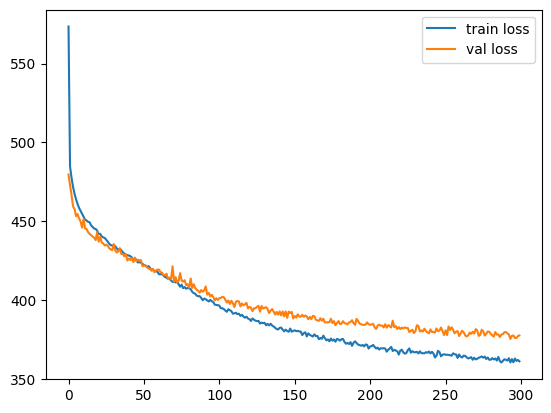

In [67]:
plt.Figure(figsize=(10,6))
sns.lineplot(data=neuro_model.history.history['loss'], label='train loss')
sns.lineplot(data=neuro_model.history.history['val_loss'], label='val loss')

metrics_evaluate(neuro_model, x_test, y_test, x_train, y_train)

Как мы видим нейронная сеть имеет неплохие показатели и судя по графику не сильно переобучена на данных.

### Дерево решений с оптимизацией глубины

Создадим модель дерева решений и посмотрим какая глубина имеет меньший процент переобучения.

In [68]:
dtr_metrics_df = pd.DataFrame()

for i in range(1,21):
    dtr_model = DecisionTreeRegressor(max_depth=i, random_state=42)  
    dtr_model.fit(x_train, y_train)
    
    dtr_metrics_df = pd.concat([dtr_metrics_df, metrics_evaluate(dtr_model, x_test, y_test, x_train, y_train)], ignore_index=True)
    
dtr_metrics_df.index = range(1,21)

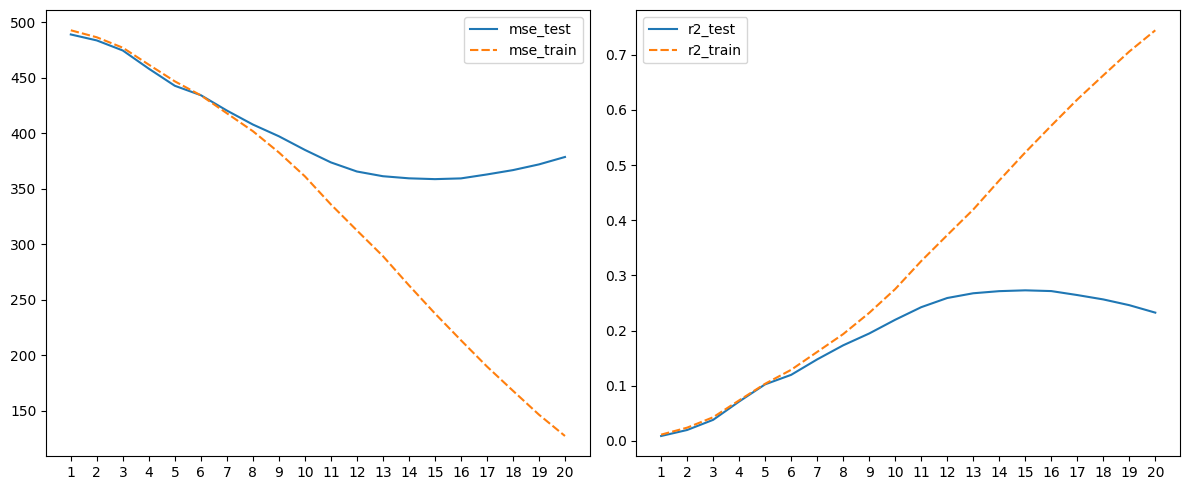

In [69]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.xticks(range(1,21))
sns.lineplot(data=dtr_metrics_df[['mse_test', 'mse_train']])

plt.subplot(1,2,2)
plt.xticks(range(1,21))
sns.lineplot(data=dtr_metrics_df[['r2_test','r2_train']])


plt.tight_layout()
plt.show()

Судя по графику наименьший процент переобучения сопостовляемый к наибольшей точности имеет дерево решений с глубиной в 6 веток.

### Градиентный бустинг

Теперь когда мы попробовали модель дерева решений, протестируем модели градиентного бустинга основанные на моделях дерева решений.  

Попробуем использовать глубину которую мы выявили ранее и использовать её для тестирования.

In [70]:
gradient_model_v1 = GradientBoostingRegressor(
    n_estimators=750,  
    learning_rate=0.075, 
    max_depth=6,  
    random_state=42,
    verbose=1,
    validation_fraction= 0.2
)

gradient_model_v1.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         489.2245           12.24m
         2         481.9964           12.12m
         3         474.4610           12.21m
         4         468.1092           12.18m
         5         463.1035           12.13m
         6         458.1312           12.15m
         7         452.8855           12.14m
         8         448.5822           12.07m
         9         445.1212           12.00m
        10         439.5749           11.96m
        20         401.1833           11.73m
        30         378.3037           11.59m
        40         357.3231           11.44m
        50         343.9039           11.31m
        60         329.8237           11.13m
        70         320.7578           10.93m
        80         312.4373           10.73m
        90         305.3061           10.55m
       100         298.2596           10.37m
       200         245.4464            8.71m
       300         213.3979            7.10m
       40

,loss,'squared_error'
,learning_rate,0.075
,n_estimators,750
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,6
,min_impurity_decrease,0.0
,init,None


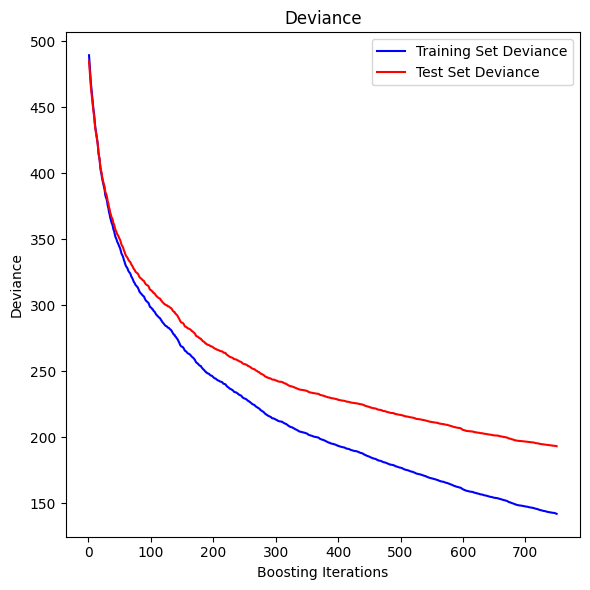

,mae_test,mae_train,mse_test,mse_train,r2_test,r2_train
0,10.440994,8.892159,193.136472,141.972404,0.608624,0.715207


In [71]:
test_score = np.zeros((750), dtype=np.float64)
for i, y_pred in enumerate(gradient_model_v1.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(750) + 1,
    gradient_model_v1.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(750) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

metrics_evaluate(gradient_model_v1, x_test, y_test, x_train, y_train)

Показатели хорошие, но разница между валидационной и тренировочной метрикой mse сильно отличается (больше чем на 20%), что значит что модель начинает переобучатся а прогресс замедляется.

Попробуем сделать настройку гиперпараметров для того, чтобы уменьшить степень переобучения и сохранить предсказательную способность.

In [72]:
gradient_model_v2 = GradientBoostingRegressor(
    n_estimators=750,  
    learning_rate=0.1, 
    max_depth=4,  
    random_state=42,
    # subsample=0.95,
    verbose=1
)

gradient_model_v2.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1         491.5365            7.83m
         2         485.8782            7.74m
         3         481.4607            7.82m
         4         477.1693            7.94m
         5         473.5569            7.94m
         6         470.4594            7.92m
         7         467.0560            7.92m
         8         460.0391            7.93m
         9         457.5681            7.92m
        10         451.9565            7.90m
        20         429.1214            7.76m
        30         411.3423            7.65m
        40         397.8275            7.59m
        50         385.6760            7.47m
        60         377.0308            7.37m
        70         369.8746            7.24m
        80         359.9284            7.12m
        90         352.3594            7.02m
       100         346.5151            6.90m
       200         305.3166            5.91m
       300         276.5715            4.85m
       40

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,750
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


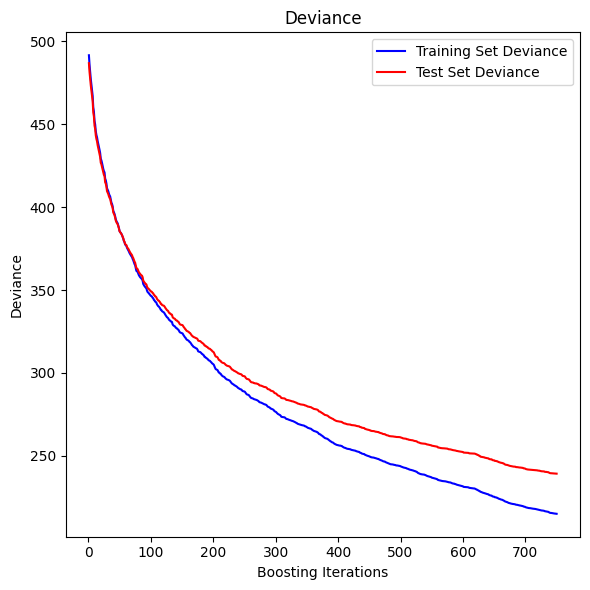

,mae_test,mae_train,mse_test,mse_train,r2_test,r2_train
0,11.716449,11.052372,239.280505,215.083243,0.515117,0.568548


In [73]:
test_score = np.zeros((750), dtype=np.float64)
for i, y_pred in enumerate(gradient_model_v2.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(750) + 1,
    gradient_model_v2.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(750) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

metrics_evaluate(gradient_model_v2, x_test, y_test, x_train, y_train)

Как мы видим, со снижением глубины дерева - мы уменьшили степень расходждения между метриками.  
Так же сохранили высокий уровень предсказательной способности, среднее отклонение от возможного зачение равно `12 еденицам популярности`, а по метрике R2 показатель имеет `0.38`, тоже высокий результат.  

Мы можем увеличить количество эпох обучения для повышения предсказательной способности и выбрать наилучшую эпоху которая будет совмещать в себе как умеренную склонность к переобучению, так и высокую предсказательную способность, но в рамках ресурсов машины на которой выполняется это задание - это времязатраный процесс.

# Кросс-валидация модели

In [74]:
scaler = StandardScaler()
x_data = pd.DataFrame(scaler.fit_transform(featured_data.drop(columns='popularity')))
y_data = featured_data['popularity']

kfld = KFold(n_splits=5, shuffle=True, random_state=52) 

In [75]:
gradient_model_v3 = GradientBoostingRegressor(
    n_estimators=750,  
    learning_rate=0.1, 
    max_depth=4,  
    random_state=42,
    # subsample=0.95,
    verbose=1
)

fold_metrics = pd.DataFrame()

for fold, (train, test) in enumerate(kfld.split(x_data)):
    x_train, x_test = x_data.iloc[train], x_data.iloc[test]
    y_train, y_test = y_data.iloc[train], y_data.iloc[test]

    # Обучение модели на тренировочных данных
    gradient_model_v3.fit(x_train, y_train)

    fold_metrics = pd.concat([metrics_evaluate(gradient_model_v3, x_test, y_test, x_train, y_train), fold_metrics], ignore_index=True)

      Iter       Train Loss   Remaining Time 
         1         492.3030            8.30m
         2         487.5451            8.17m
         3         481.7005            8.11m
         4         477.8587            8.03m
         5         473.3823            8.01m
         6         470.1603            7.99m
         7         467.4991            7.96m
         8         464.4720            7.93m
         9         459.6046            7.92m
        10         456.4486            7.90m
        20         429.4850            7.76m
        30         412.4548            7.63m
        40         398.5937            7.56m
        50         390.1027            7.42m
        60         382.1260            7.30m
        70         373.3079            7.19m
        80         365.2440            7.07m
        90         355.7739            6.96m
       100         350.6293            6.85m
       200         304.1672            5.79m
       300         275.5490            4.78m
       40

In [77]:
fold_metrics

,mae_test,mae_train,mse_test,mse_train,r2_test,r2_train
1,11.745743,11.005566,239.834833,212.936317,0.519722,0.571582
2,11.644970,10.962792,241.223617,212.023321,0.512416,0.574419
3,11.626868,10.985751,235.109698,211.823029,0.527690,0.574150
4,11.725023,11.075887,241.231885,215.090397,0.516129,0.567428
5,11.711054,11.061224,238.233089,214.758159,0.520518,0.568472


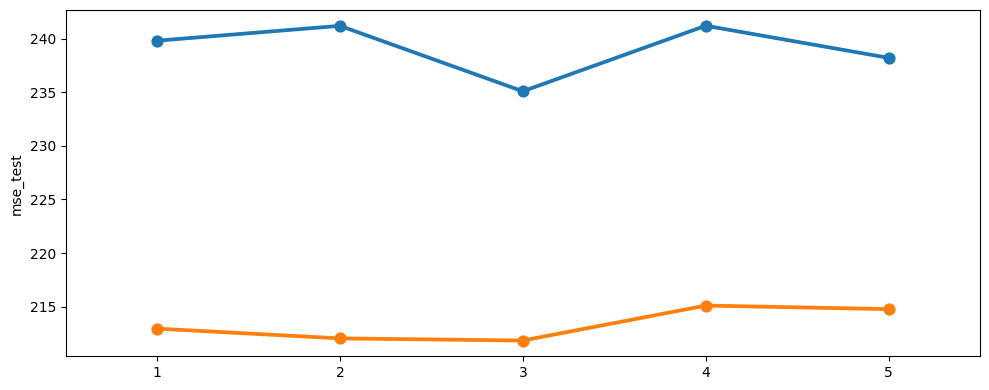

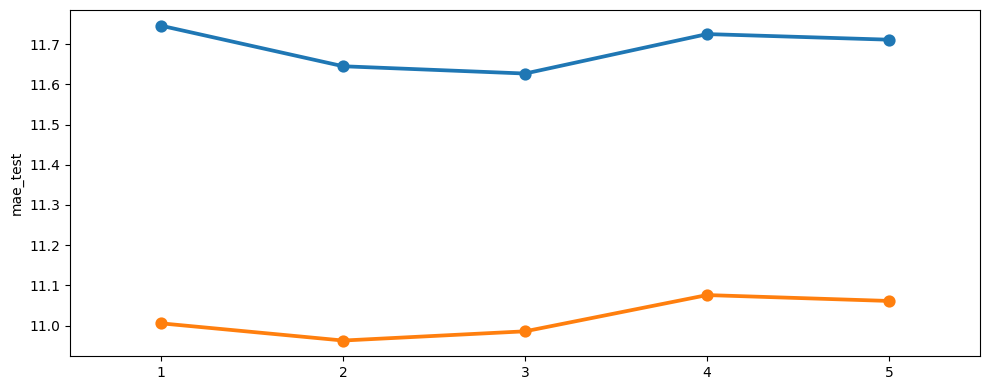

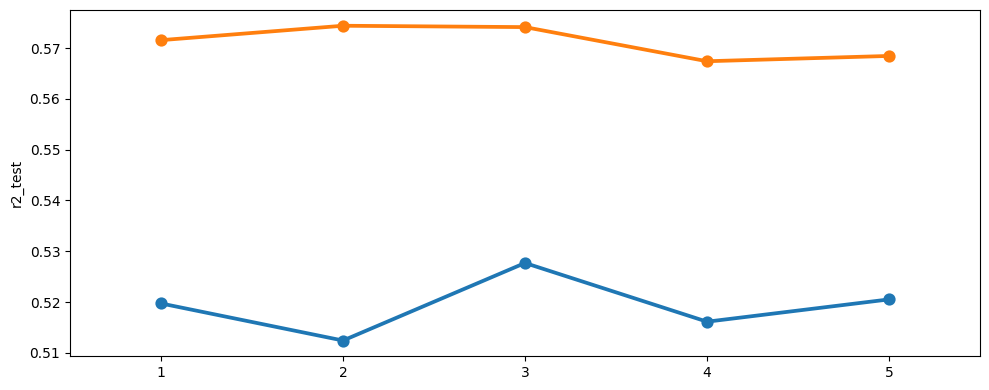

In [76]:
fold_metrics.index = range(1,6)
fold_metrics.index = fold_metrics.index.astype(str)

plt.figure(figsize=(10,4))
sns.pointplot(fold_metrics['mse_test'], native_scale=True).set_label('test')
sns.pointplot(fold_metrics['mse_train'], native_scale=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.pointplot(fold_metrics['mae_test'], native_scale=True, label='mae_test')
sns.pointplot(fold_metrics['mae_train'], native_scale=True, label='mae_train')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.pointplot(fold_metrics['r2_test'], native_scale=True, label='r2_test')
sns.pointplot(fold_metrics['r2_train'], native_scale=True, label='r2_train')
plt.tight_layout()
plt.show()

Кросс-валидация показывает, что в результаты сегментирования обучающей выборки и обучения на ней, сильно не влияет на предсказательную способность.

# Заключение

Кросс-валидация модели градиентного бустинга на пяти фолдах подтверждает стабильность предсказательной способности, с средними значениями MAE на тестовых данных около 12,5 единиц и R2 около 0,38. Различия между метриками на обучающих и валидационных выборках минимальны, указывая на отсутствие значительного переобучения. Уменьшение глубины дерева до 4 снижает расхождение метрик, сохраняя точность, что подтверждает оптимальность выбранных гиперпараметров.  

Анализ графиков метрик (MSE, MAE, R2) по фолдам показывает, что сегментирование обучающей выборки не оказывает существенного влияния на производительность модели. Метрики на тестовых данных варьируются в пределах 263–304 для MSE и 0,38–0,47 для R2, демонстрируя надежность подхода. Рекомендуется расширение числа итераций бустинга для улучшения результатов при наличии вычислительных ресурсов.  

Модель обеспечивает приемлемое предсказание популярности треков с отклонением 12–13 единиц. Полученные показатели позволяют применять ее в анализе музыкальных данных без корректировок.